

# Credit Card Fraud Detection



**Importing Dependencies**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

**Loading dataset**

In [125]:
data = pd.read_csv('creditcard.csv')

**Data Analysis**

In [126]:
print("\nHead of the dataset:")
print(data.head())


Head of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

In [127]:
print("\nTail of the dataset:")
print(data.tail())


Tail of the dataset:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480

In [128]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [129]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (284807, 31)


In [158]:
print("\nDataset Information:", data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     275663 

In [159]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


In [130]:
print("\nNull values in the dataset:")
print(data.isnull().sum())


Null values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Visualization**

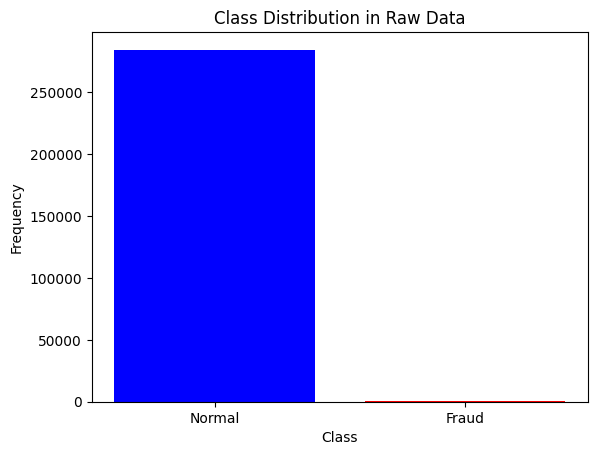

In [131]:
# Visualization of  bar plot
class_counts = data['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.title('Class Distribution in Raw Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

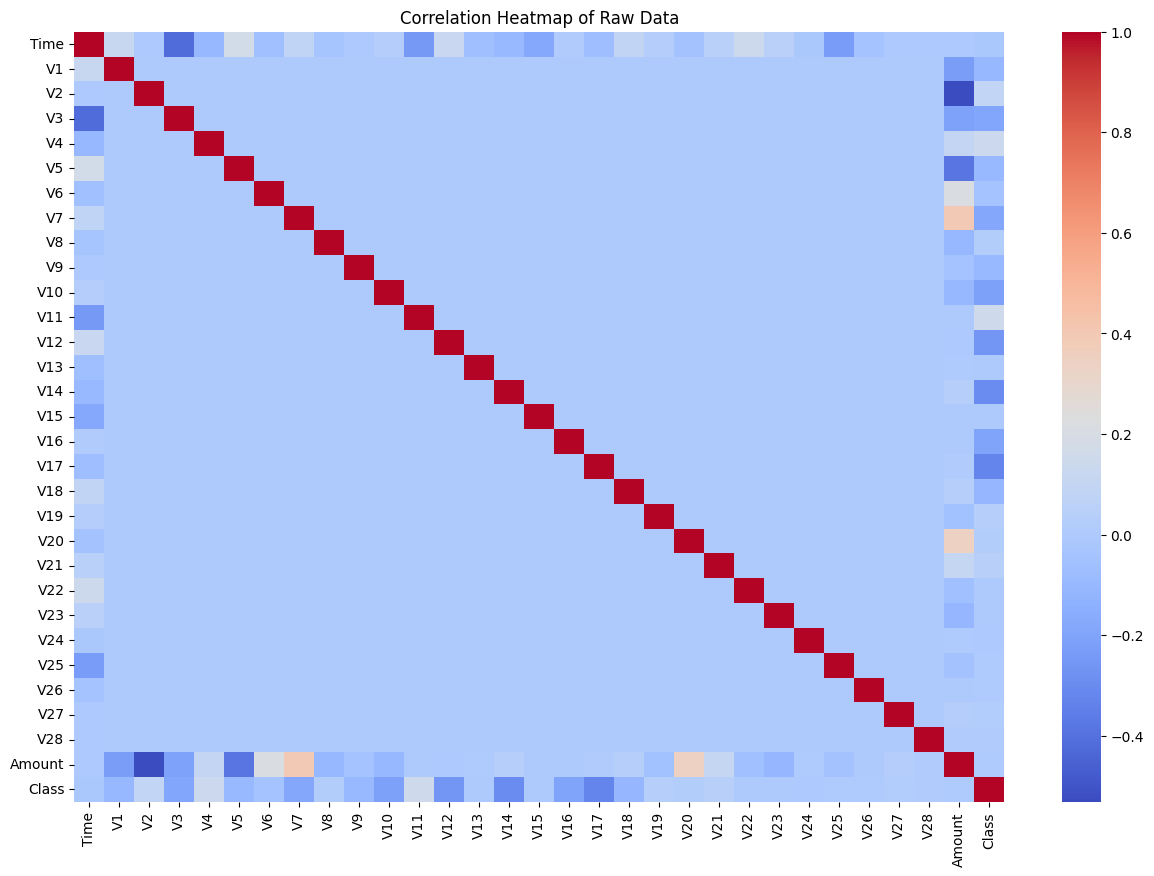

In [132]:
# Heatmap to visualize correlations
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Raw Data')
plt.show()

In [133]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [134]:
data = data.drop(['Time'], axis=1)
data = data.drop_duplicates()
print("\nDataset Shape after cleaning:", data.shape)
print(data['Class'].value_counts())


Dataset Shape after cleaning: (275663, 30)
Class
0    275190
1       473
Name: count, dtype: int64


In [135]:
print("\nDataset Shape after cleaning:", data.shape)
print(data['Class'].value_counts())


Dataset Shape after cleaning: (275663, 30)
Class
0    275190
1       473
Name: count, dtype: int64


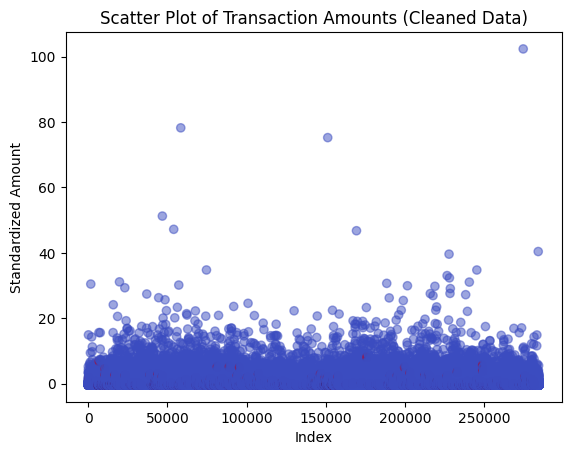

In [136]:
# Scatter plot of cleaned data
plt.scatter(data.index, data['Amount'], alpha=0.5, c=data['Class'], cmap='coolwarm')
plt.title('Scatter Plot of Transaction Amounts (Cleaned Data)')
plt.xlabel('Index')
plt.ylabel('Standardized Amount')
plt.show()

In [138]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [140]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [141]:
# Evaluate classifiers on the raw data
print("\nEvaluation on Raw Data:")
raw_scores = []
for name, clf in classifiers.items():
    print(f"\n========== {name} ===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    raw_scores.append([name, acc, prec, rec, f1])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")


Evaluation on Raw Data:

========== Logistic Regression ===========
Accuracy: 0.9993
Precision: 0.8906
Recall: 0.6264
F1 Score: 0.7355

========== Decision Tree Classifier ===========
Accuracy: 0.9990
Precision: 0.6837
Recall: 0.7363
F1 Score: 0.7090


**Under-Sampling**

In [142]:

normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]


In [143]:
normal_sample = normal.sample(n=fraud.shape[0])
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


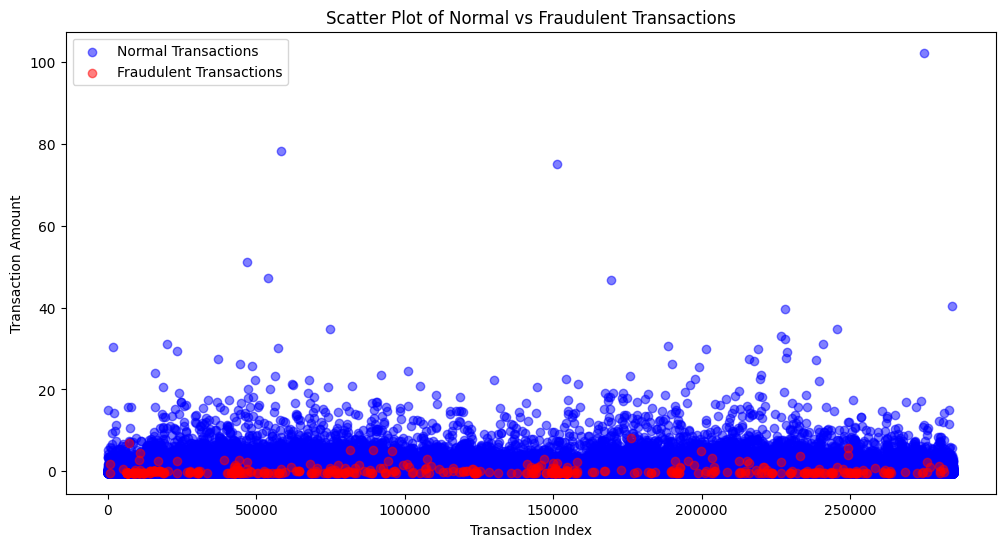

In [160]:
plt.figure(figsize=(12, 6))
plt.scatter(normal.index, normal['Amount'], alpha=0.5, label='Normal Transactions', color='blue')
plt.scatter(fraud.index, fraud['Amount'], alpha=0.5, label='Fraudulent Transactions', color='red')
plt.title('Scatter Plot of Normal vs Fraudulent Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

In [144]:
# Split the balanced dataset
X = new_data.drop('Class', axis=1)
y = new_data['Class']


In [154]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.475315,1.049001,1.781780,1.101956,0.461021,-0.484097,1.052987,-0.321786,-0.515330,0.649340,...,-0.544247,-1.036156,0.179916,0.353936,0.063424,-0.664783,0.110114,0.010717,-0.183311,0
1,0.956891,-1.403289,-0.037293,-1.440457,-0.816330,0.193657,-0.476316,-0.172668,1.767556,-0.866729,...,-0.396968,-0.612041,-0.334563,-0.997559,0.573462,-0.647983,0.053287,0.055211,0.612268,0
2,1.107298,-0.170076,1.499309,0.610809,-1.214932,-0.196013,-0.822915,0.157357,0.345125,0.038578,...,0.306800,0.909278,-0.044279,0.605420,0.173992,0.437062,0.020499,0.028680,-0.265511,0
3,1.194352,-0.633998,0.033808,-0.241007,-0.615379,-0.397688,-0.162676,-0.272583,-1.093880,0.650803,...,-0.432383,-0.975768,-0.108751,-0.433280,0.328098,0.403076,-0.028523,0.035071,0.160045,0
4,1.445825,-1.167408,0.065631,-1.476644,-1.363367,-0.640204,-0.929969,-0.071838,-1.989845,1.657485,...,-0.112756,-0.098297,-0.101193,-0.039704,0.475941,-0.111268,0.000302,0.005258,-0.161361,0


In [155]:
new_data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
945,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [157]:
new_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,...,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,-2.250028,1.675657,-3.352272,2.179847,-1.475085,-0.725359,-2.581325,0.453395,-1.297265,-2.729448,...,0.227937,0.022461,-0.078781,-0.052759,0.012991,0.030072,0.110001,0.042014,0.088549,0.500000
std,5.319163,3.561901,6.017910,3.194467,4.118270,1.694788,5.550428,4.037324,2.257084,4.357244,...,1.992053,0.981460,1.175924,0.567098,0.682194,0.467153,0.922252,0.420451,0.975910,0.500264
min,-30.552380,-14.811940,-31.103685,-4.011848,-22.105532,-7.216809,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.371087,-7.263482,-2.925855,-0.353229,0.000000
25%,-2.752126,-0.168618,-4.951307,-0.198957,-1.754592,-1.601628,-3.022498,-0.222571,-2.274985,-4.480683,...,-0.166671,-0.551160,-0.246858,-0.415312,-0.336333,-0.283748,-0.063028,-0.054819,-0.346103,0.000000
50%,-0.751764,0.979787,-1.219251,1.197590,-0.456031,-0.635555,-0.658624,0.157855,-0.733363,-0.876926,...,0.130060,0.013331,-0.033324,0.004996,0.046475,-0.007291,0.053270,0.035679,-0.280704,0.500000
75%,0.950579,2.653723,0.334797,4.127228,0.557988,0.069545,0.325020,0.852353,0.164724,0.067226,...,0.650170,0.548872,0.181527,0.381915,0.385424,0.327346,0.454949,0.218938,0.046539,1.000000
max,2.332026,22.057729,3.145596,12.114672,11.095089,6.474115,5.802537,20.007208,4.401053,6.318517,...,27.202839,8.361985,5.466230,1.758615,2.208209,2.745261,3.052358,1.779364,8.146182,1.000000


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Evaluate classifiers on the undersampled data
print("\nEvaluation on Undersampled Data:")
undersample_scores = []
for name, clf in classifiers.items():
    print(f"\n========== {name} (Undersampling) ===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    undersample_scores.append([name, acc, prec, rec, f1])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")


Evaluation on Undersampled Data:

========== Logistic Regression (Undersampling) ===========
Accuracy: 0.9526
Precision: 0.9895
Recall: 0.9216
F1 Score: 0.9543

========== Decision Tree Classifier (Undersampling) ===========
Accuracy: 0.8895
Precision: 0.9010
Recall: 0.8922
F1 Score: 0.8966


**Over-Sampling**

In [147]:
# Oversampling using SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [149]:
# Evaluate classifiers on the oversampled data
print("\nEvaluation on Oversampled Data:")
oversample_scores = []
for name, clf in classifiers.items():
    print(f"\n========== {name} (Oversampling) ===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    oversample_scores.append([name, acc, prec, rec, f1])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")


Evaluation on Oversampled Data:

========== Logistic Regression (Oversampling) ===========
Accuracy: 0.9526
Precision: 0.9895
Recall: 0.9216
F1 Score: 0.9543

========== Decision Tree Classifier (Oversampling) ===========
Accuracy: 0.9105
Precision: 0.9293
Recall: 0.9020
F1 Score: 0.9154


**Conclusion***

In [152]:
def create_summary_table(scores, title):
    summary_table = pd.DataFrame(scores, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
    summary_table.set_index("Model", inplace=True)
    print(f"\n{title}:")
    print(summary_table)

In [153]:
create_summary_table(raw_scores, "Summary Table for Raw Data")
create_summary_table(undersample_scores, "Summary Table for Undersampled Data")
create_summary_table(oversample_scores, "Summary Table for Oversampled Data")


Summary Table for Raw Data:
                          Accuracy  Precision    Recall  F1 Score
Model                                                            
Logistic Regression       0.999256   0.890625  0.626374  0.735484
Decision Tree Classifier  0.999002   0.683673  0.736264  0.708995

Summary Table for Undersampled Data:
                          Accuracy  Precision    Recall  F1 Score
Model                                                            
Logistic Regression       0.952632   0.989474  0.921569  0.954315
Decision Tree Classifier  0.889474   0.900990  0.892157  0.896552

Summary Table for Oversampled Data:
                          Accuracy  Precision    Recall  F1 Score
Model                                                            
Logistic Regression       0.952632   0.989474  0.921569  0.954315
Decision Tree Classifier  0.910526   0.929293  0.901961  0.915423
